In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import csv

In [ ]:
# Upload Local Dataset (Nodes)
from google.colab import files
uploaded = files.upload()

Saving cut rizki terget.csv to cut rizki terget.csv


In [ ]:
df_tweets = pd.read_csv('cut rizki terget.csv', sep =",")
df_tweets.head()

,Unnamed: 0,source,target
0,0,cupacakepie,gltoss
1,1,faktahukum_ntt,NaN
2,2,Mercybinter_,NaN
3,3,Fadhil_188,xophieela
4,4,delaalma17,NaN


In [ ]:
df_tweets2 = df_tweets.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_tweets2 = df_tweets.drop(['Unnamed: 0','Datetime', 'Tweet Id', 'Text', 'Location', 'Followers', 'Following', 'Verified', 'Retweet', 'Language', 'Media', 'Description','DisplayName'], axis=1)
df_tweets2

,Username,Reply Username
0,xelisaaP,Rashta2
1,irmaristia_,Arukasu17
2,ksk_famima,skipberat
3,flaminGyuu,womanfeeds_id
4,lovenycat,lovenycat
...,...,...
423,ryejenafa,ryejenafa
424,cakesicless,ohmybeautybank
425,IDNEvent,IDNEvent
426,dreamydhae_,bombockats


In [ ]:
df_tweets2.rename(columns={'Reply Username': 'target', 'Username': 'source'}, inplace=True)

In [ ]:
df_tweets2

,source,target
0,cupacakepie,gltoss
1,faktahukum_ntt,NaN
2,Mercybinter_,NaN
3,Fadhil_188,xophieela
4,delaalma17,NaN
...,...,...
124,Crahmar,NaN
125,DELoneNFT,s4usgarlic
126,mentalfreeze_,bombockats
127,NisaElan,cutrizki_amanda


In [ ]:
df_tweets2.to_csv("cut rizki terget.csv")

VISUALIZE

In [ ]:
# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


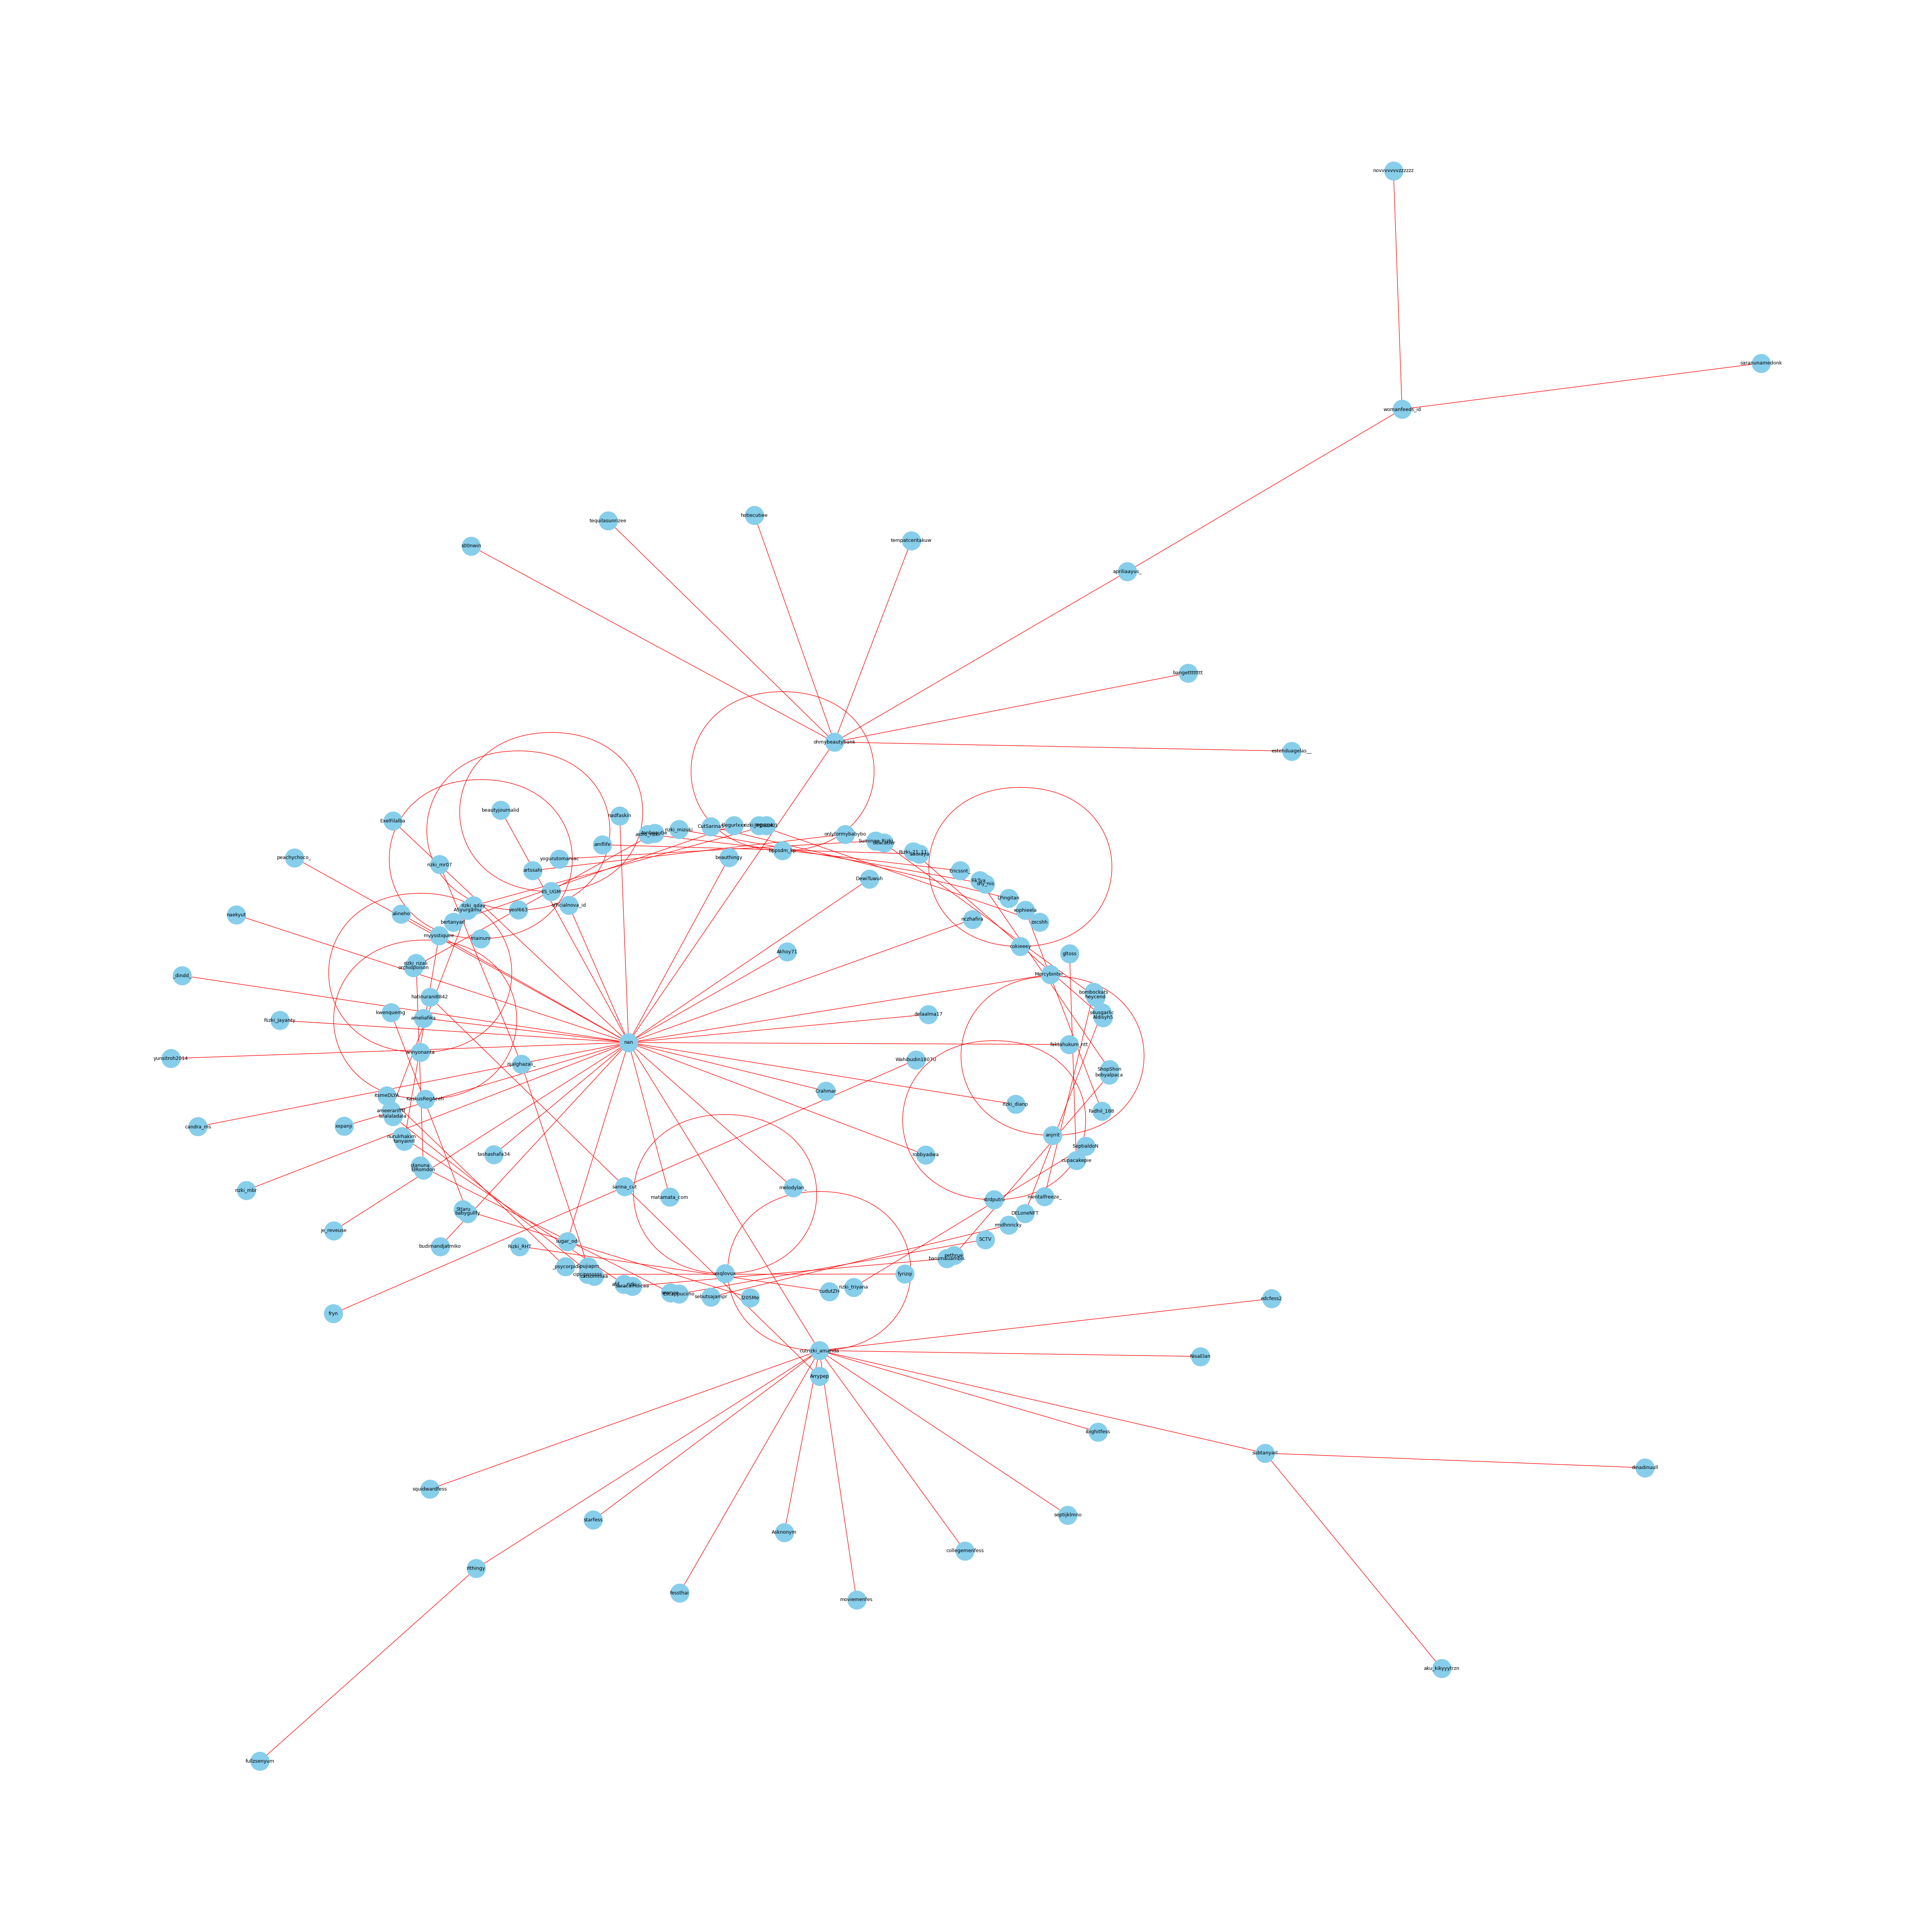

In [ ]:
# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True,
        node_color='skyblue', node_size=1200,
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

CENTRALITY MEASUREMENT

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[(nan, 32),
 ('cutrizki_amanda', 15),
 ('ohmybeautybank', 8),
 ('sarina_cut', 4),
 ('womanfeeds_id', 3),
 ('subtanyarl', 3),
 ('cokieeey', 2),
 ('bppsdm_kp', 2),
 ('apriliaayus_', 2),
 ('IIS_UGM', 2)]

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:20]

[(nan, 0.1468591691995947),
 ('cutrizki_amanda', 0.0740628166160081),
 ('ohmybeautybank', 0.05157041540020263),
 ('apriliaayus_', 0.016413373860182368),
 ('womanfeeds_id', 0.011246200607902735),
 ('subtanyarl', 0.011246200607902735),
 ('rlthingy', 0.0056737588652482265),
 ('sarina_cut', 0.00060790273556231),
 ('rijalghazali_', 0.00010131712259371833),
 ('cupacakepie', 0.0),
 ('gltoss', 0.0),
 ('faktahukum_ntt', 0.0),
 ('Mercybinter_', 0.0),
 ('Fadhil_188', 0.0),
 ('xophieela', 0.0),
 ('delaalma17', 0.0),
 ('nczhafira', 0.0),
 ('ShopShon', 0.0),
 ('FikTya_', 0.0),
 ('estehduagelas__', 0.0)]

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:20]

[(nan, 0.2560283687943262),
 ('cutrizki_amanda', 0.19864269992663242),
 ('ohmybeautybank', 0.1828774062816616),
 ('faktahukum_ntt', 0.157825706791023),
 ('Mercybinter_', 0.157825706791023),
 ('delaalma17', 0.157825706791023),
 ('nczhafira', 0.157825706791023),
 ('DewiTuwuh', 0.157825706791023),
 ('beauthingy', 0.157825706791023),
 ('nadfaskin', 0.157825706791023),
 ('Akhoy71', 0.157825706791023),
 ('officialnova_id', 0.157825706791023),
 ('beautyjournalid', 0.157825706791023),
 ('alineho', 0.157825706791023),
 ('ExelFilalba', 0.157825706791023),
 ('peachychoco_', 0.157825706791023),
 ('naekyut', 0.157825706791023),
 ('Rizki_Jayanty', 0.157825706791023),
 ('_dindd_', 0.157825706791023),
 ('yunsitroh2014', 0.157825706791023)]

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[(nan, 0.6827548704572539),
 ('cutrizki_amanda', 0.2539533738574923),
 ('ohmybeautybank', 0.14959209401847476),
 ('matamata_com', 0.11810897130042283),
 ('rizki_dianp', 0.11810897130042282),
 ('faktahukum_ntt', 0.11810897130042279),
 ('Mercybinter_', 0.11810897130042278),
 ('tashashafa34', 0.11810897130042278),
 ('Akhoy71', 0.11810897130042276),
 ('ameliafika', 0.11810897130042275)]

AttributeError: ignored

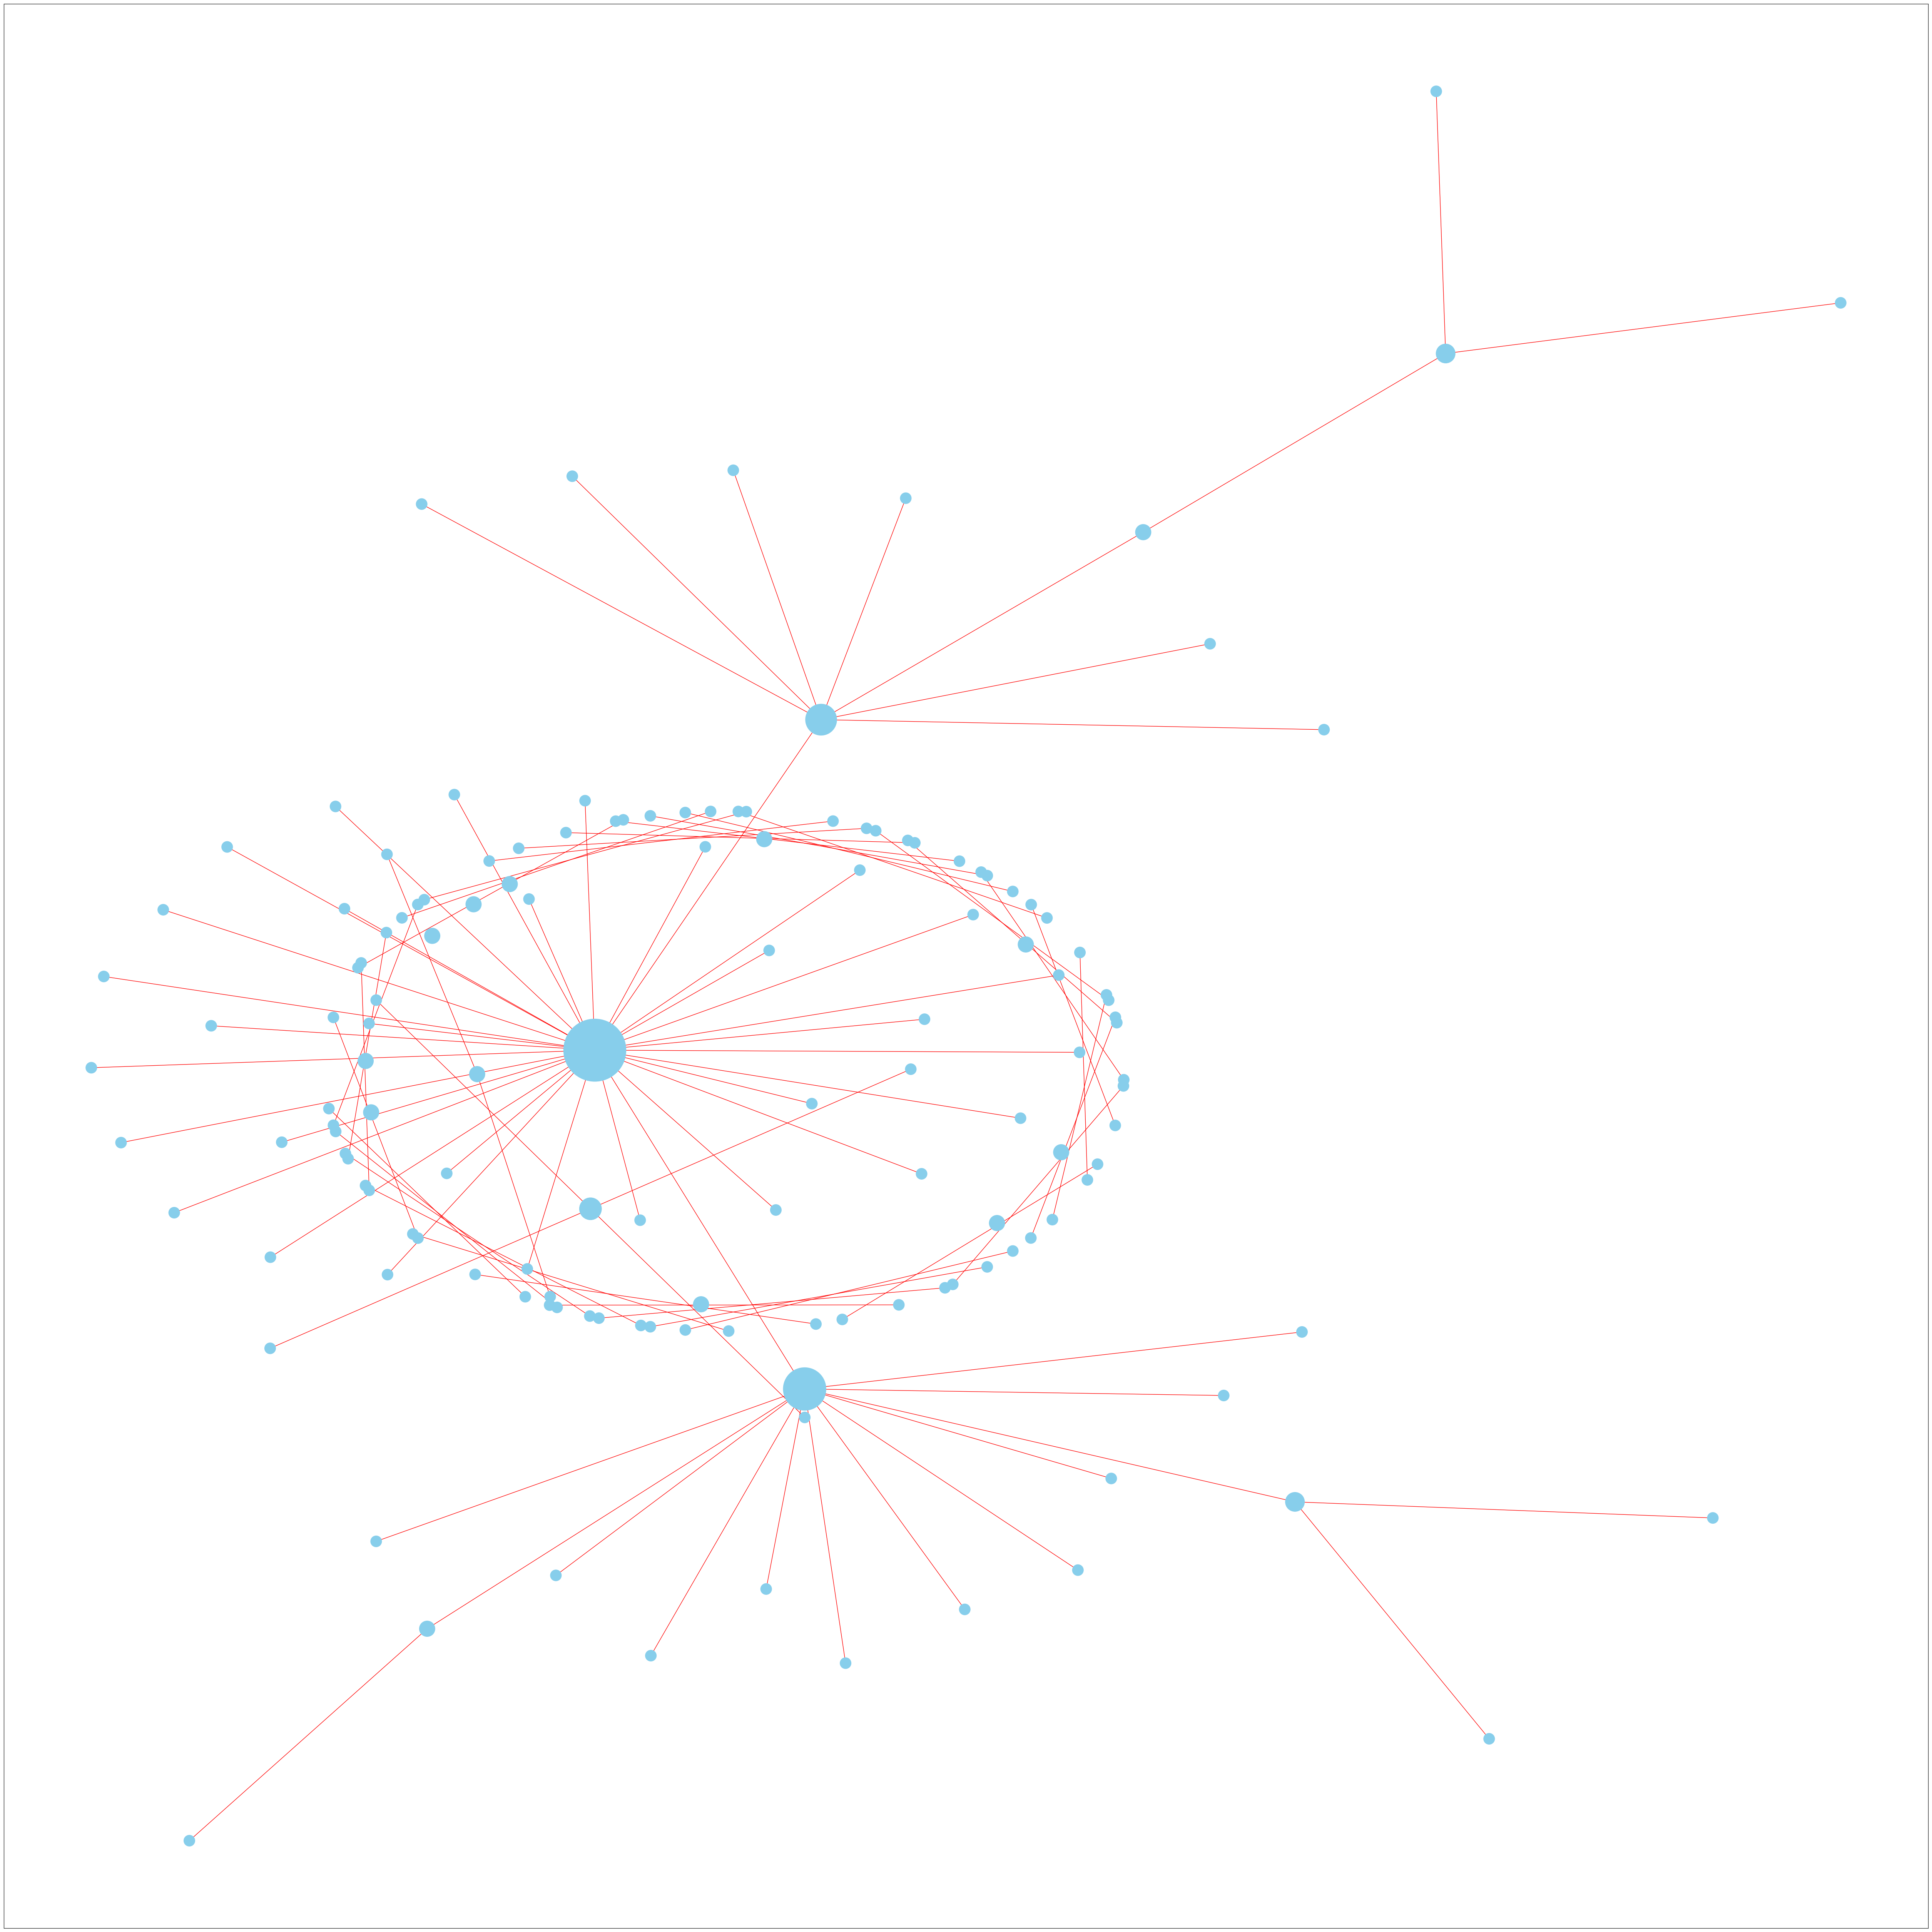

In [ ]:
# Set Degree Dictionary
d = dict(degree)

# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True,
        node_color='skyblue', nodelist=d.keys(),
        node_size=[v * 60000 for v in d.values()],
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=10,
        pos=nx.kamada_kawai_layout(G1))

NETWORK TOPOLOGY MEASUREMENT

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(G1)

142

In [ ]:
# Show Number of Edges
nx.number_of_edges(G1)

107

In [ ]:
# Show Graph Density
nx.density(G1)

0.010688242932773949

In [ ]:
# Show Number of Connected Component
nx.number_connected_components(G1)

46

Community detection

In [ ]:
pip install --upgrade networkx

In [ ]:

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Create your graph (G1)
G1 = nx.Graph()

# Detect communities using the Louvain algorithm
communities = nx.algorithms.community.girvan_newman(G1)

# Print the detected communities
for i, community in enumerate(communities):
    print(f"Community {i + 1}: {community}")


Community 1: ()
